# Sediment released by sea-ice

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import pickle
import xarray as xr
from matplotlib.colors import ListedColormap

%matplotlib inline

#### Parameters

In [32]:
# domain dimensions:
imin, imax = 1139, 2179
jmin, jmax = 159, 799

# Colormap
N = 256
vals_cont = np.ones((N, 4))
vals_cont[:, 0] = np.linspace(117/N, 1, N)
vals_cont[:, 1] = np.linspace(82/N, 1, N)
vals_cont[:, 2] = np.linspace(60/N, 1, N)
sed_cmap = ListedColormap(vals_cont).reversed()

# Colors
land_color = '#a9a7a2'

#### Files

In [33]:
# Modified ANHA12 mesh mask file (http://knossos.eas.ualberta.ca/anha/anhatable.php)
mesh         = xr.open_dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mask_Pb-20220317.nc')
mesh_lon     = mesh['nav_lon'].values
mesh_lat     = mesh['nav_lat'].values
depths       = mesh['nav_lev'].values
mesh_bathy   = mesh['tmask'].values[0,:,:,:]
bathy_masked = np.ma.masked_where((mesh_bathy> 0.1), mesh_bathy)

In [34]:
# Sediment in ice forcing file created by forcing/sediment-in-ice.ipynb
ice_file = xr.open_dataset('/ocean/brogalla/GEOTRACES/data/ice_sediment-step35.nc')
ice_prop = ice_file['prop_shelf'].values

#### Figures

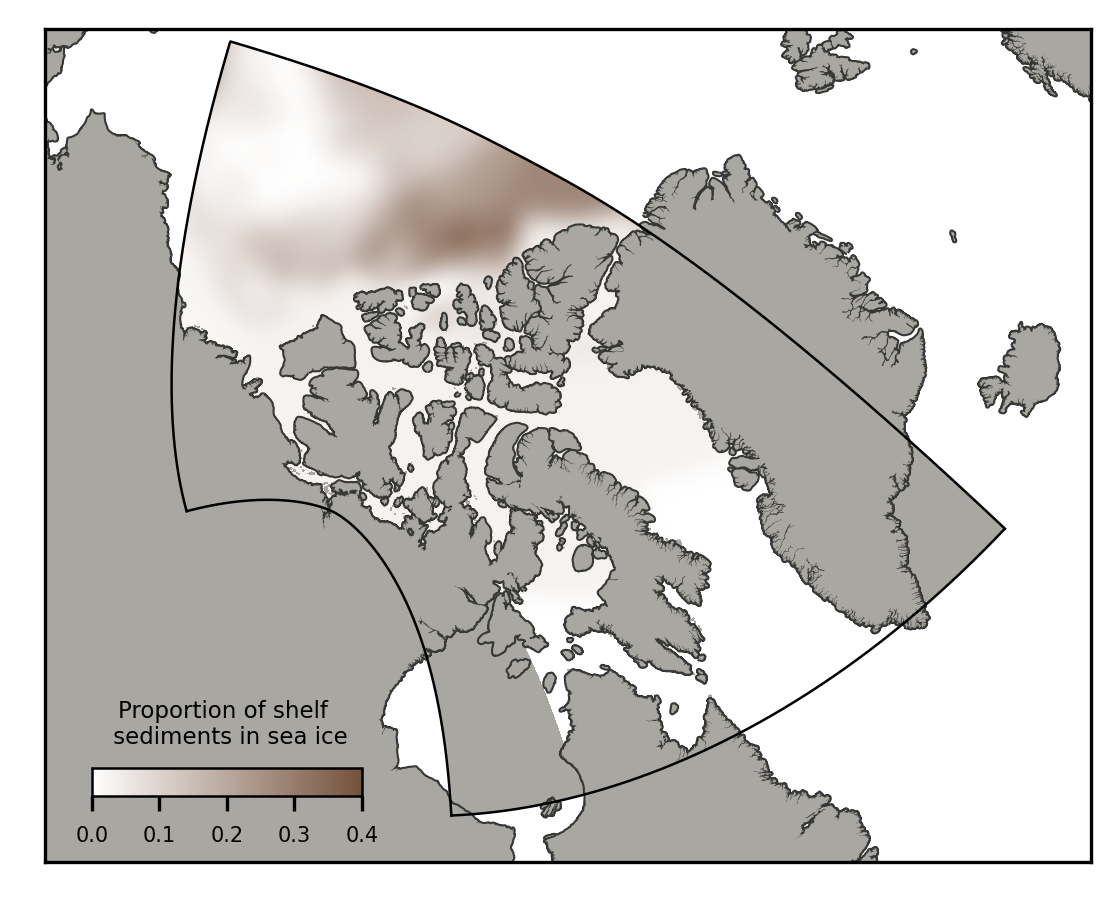

In [35]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/Pb-map.pickle','rb'))

x_model, y_model = proj1(mesh_lon, mesh_lat)
CS1 = proj1.pcolormesh(x_model, y_model, ice_prop, vmin=0.0, vmax=0.4, cmap=sed_cmap)

proj1.plot(x_model[imin:imax,jmin], y_model[imin:imax,jmin], 'k-', lw=0.6,zorder=5)
proj1.plot(x_model[imin:imax,jmax], y_model[imin:imax,jmax], 'k-', lw=0.6,zorder=5)
proj1.plot(x_model[imin,jmin:jmax], y_model[imin,jmin:jmax], 'k-', lw=0.6,zorder=5)
proj1.plot(x_model[imax,jmin:jmax], y_model[imax,jmin:jmax], 'k-', lw=0.6,zorder=5)

proj1.pcolormesh(x_model[imin:imax,jmin:jmax], y_model[imin:imax,jmin:jmax], bathy_masked[0,imin:imax,jmin:jmax], \
                 cmap=ListedColormap([land_color]), vmin=0, vmax=1)

cbaxes1 = fig.add_axes([0.16, 0.19, 0.2, 0.025]) 
CB1 = plt.colorbar(CS1, cax=cbaxes1, orientation='horizontal', ticks=np.arange(0,1.1,0.1))
CB1.ax.tick_params(labelsize=5)
CB1.outline.set_linewidth(0.6)
CB1.ax.set_title('Proportion of shelf \n sediments in sea ice', fontsize=5.5)

fig.savefig('/ocean/brogalla/GEOTRACES/figures/Pb_explorations/S5-sediment-in-ice.jpg', dpi=300, bbox_inches='tight')